In [1]:
#Import all necessary modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from ggplot import *

#Change some IPython settings:
pd.set_option('display.max_columns', 100)

#Read in data:
teams = pd.read_csv('teams.csv', index_col = [0])
games = pd.read_csv('games.csv',index_col = False, parse_dates = [1])
players = pd.read_csv('players.csv', index_col = False)
gameStats = pd.read_csv('gameStats.csv', index_col = False, parse_dates = [2])
games.index = games.game_id

In [14]:
gameStats.loc[:,'PTS_diff':'FT_rate'].cov().applymap(lambda x: round(x,2))

,PTS_diff,PACE,AST_ratio,DEF_eff,OFF_eff,FGP_adj,TO_rate,DREB_p,OREB_p,FT_rate
PTS_diff,178.51,0.00,19.54,-97.34,97.34,0.49,-0.08,0.15,-0.21,0.15
PACE,0.00,35.90,-0.02,-2.82,-2.82,0.03,0.02,0.07,-0.07,0.04
AST_ratio,19.54,-0.02,11.02,-1.88,19.47,0.13,-0.02,0.00,-0.07,-0.05
DEF_eff,-97.34,-2.82,-1.88,131.99,25.34,0.06,-0.05,-0.23,0.26,0.06
OFF_eff,97.34,-2.82,19.47,25.34,131.99,0.59,-0.14,-0.06,0.03,0.22
FGP_adj,0.49,0.03,0.13,0.06,0.59,0.00,0.00,-0.00,-0.00,0.00
TO_rate,-0.08,0.02,-0.02,-0.05,-0.14,0.00,0.00,-0.00,0.00,0.00
DREB_p,0.15,0.07,0.00,-0.23,-0.06,-0.00,-0.00,0.01,-0.00,-0.00
OREB_p,-0.21,-0.07,-0.07,0.26,0.03,-0.00,0.00,-0.00,0.01,-0.00
FT_rate,0.15,0.04,-0.05,0.06,0.22,0.00,0.00,-0.00,-0.00,0.01


In [30]:
gameStats.head()

,game_id,h_or_a,date,season,team,team_id,home_01,win_01,PTSF,PTSA,AST,BLK,DREB,OREB,REB,MIN,PF,STL,TO,3PM,3PA,FGM,FGA,FTM,FTA,+/-,PTS_diff,PACE,AST_ratio,DEF_eff,OFF_eff,FGP_adj,TO_rate,DREB_p,OREB_p,FT_rate
0,241102006,home,2004-11-02,2005,Dallas Mavericks,6,True,True,107,98,27,8,30,13,43,240,23,11,14,7,16,40,81,20,23,NaN,9,91.364046,20.435967,107.263201,117.113903,0.537037,0.153233,0.625000,0.302326,0.246914
1,241102006,away,2004-11-02,2005,Sacramento Kings,25,False,False,98,107,21,6,25,18,43,240,19,9,15,3,17,36,87,23,30,NaN,-9,91.364046,15.418502,117.113903,107.263201,0.431034,0.164178,0.657895,0.418605,0.264368
2,241102008,home,2004-11-02,2005,Detroit Pistons,8,True,True,87,79,20,5,29,13,42,240,22,9,12,6,18,32,72,17,25,NaN,8,82.496447,17.391304,95.761699,105.459087,0.486111,0.145461,0.763158,0.309524,0.236111
3,241102008,away,2004-11-02,2005,Houston Rockets,10,False,False,79,87,8,5,27,9,36,240,24,4,16,6,13,28,71,17,22,NaN,-8,82.496447,7.642339,105.459087,95.761699,0.436620,0.193948,0.675000,0.250000,0.239437
4,241102013,home,2004-11-02,2005,Los Angeles Lakers,13,True,True,89,78,23,9,37,10,47,240,22,8,19,5,17,30,70,24,30,NaN,11,92.237215,18.370607,84.564566,96.490338,0.464286,0.205991,0.698113,0.212766,0.342857


In [42]:
homeStats = gameStats[gameStats.home_01 == True]
awayStats = gameStats[gameStats.home_01 == False]

In [77]:
colNames_full = ['game_id', 'h_or_a', 'date', 'season', 
                 'team', 'team_id', 'home_01', 'win_01', 
                 'PTSF', 'PTSA', 'AST', 'BLK', 'DREB', 
                 'OREB', 'REB', 'MIN', 'PF', 'STL', 'TO', 
                 '3PM', '3PA', 'FGM', 'FGA', 'FTM', 'FTA', 
                 '+/-', 'PTS_diff', 'PACE', 'AST_ratio', 
                 'DEF_eff', 'OFF_eff', 'FGP_adj', 'TO_rate', 
                 'DREB_p', 'OREB_p', 'FT_rate']
colNames_preds = ['home_01', 'win_01',
                 'PTSF', 'PTSA', 'AST', 'BLK', 'DREB', 
                 'OREB', 'REB', 'MIN', 'PF', 'STL', 'TO', 
                 '3PM', '3PA', 'FGM', 'FGA', 'FTM', 'FTA', 
                 '+/-', 'PTS_diff', 'PACE', 'AST_ratio', 
                 'DEF_eff', 'OFF_eff', 'FGP_adj', 'TO_rate', 
                 'DREB_p', 'OREB_p', 'FT_rate']
colNames_num = ['PTSF', 'PTSA', 'AST', 'BLK', 'DREB', 
                 'OREB', 'REB', 'MIN', 'PF', 'STL', 'TO', 
                 '3PM', '3PA', 'FGM', 'FGA', 'FTM', 'FTA', 
                 '+/-', 'PTS_diff', 'PACE', 'AST_ratio', 
                 'DEF_eff', 'OFF_eff', 'FGP_adj', 'TO_rate', 
                 'DREB_p', 'OREB_p', 'FT_rate']

 
lookback = 21
#homeStatsMA = pd.rolling_mean(homeStats.loc[:,colNames_preds], lookback)



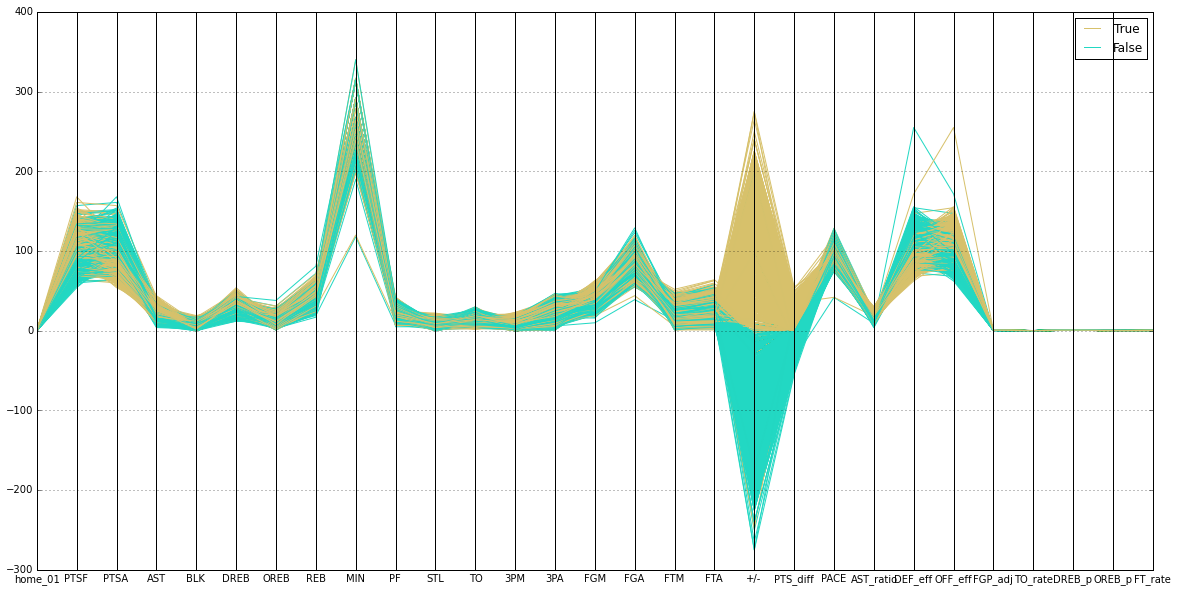

In [75]:
#from pandas.tools.plotting import andrews_curves
from pandas.tools.plotting import parallel_coordinates

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#andrews_curves(gameStats.loc[:,colNames], 'win_01')
parallel_coordinates(gameStats.loc[:,colNames_preds], 'win_01')


In [108]:
boom = gameStats.loc[:, colNames_preds]
gameStats_norm = (boom - boom.mean()) / (boom.std())
gameStats_norm.home_01 = gameStats.home_01
gameStats_norm.win_01 = gameStats.win_01

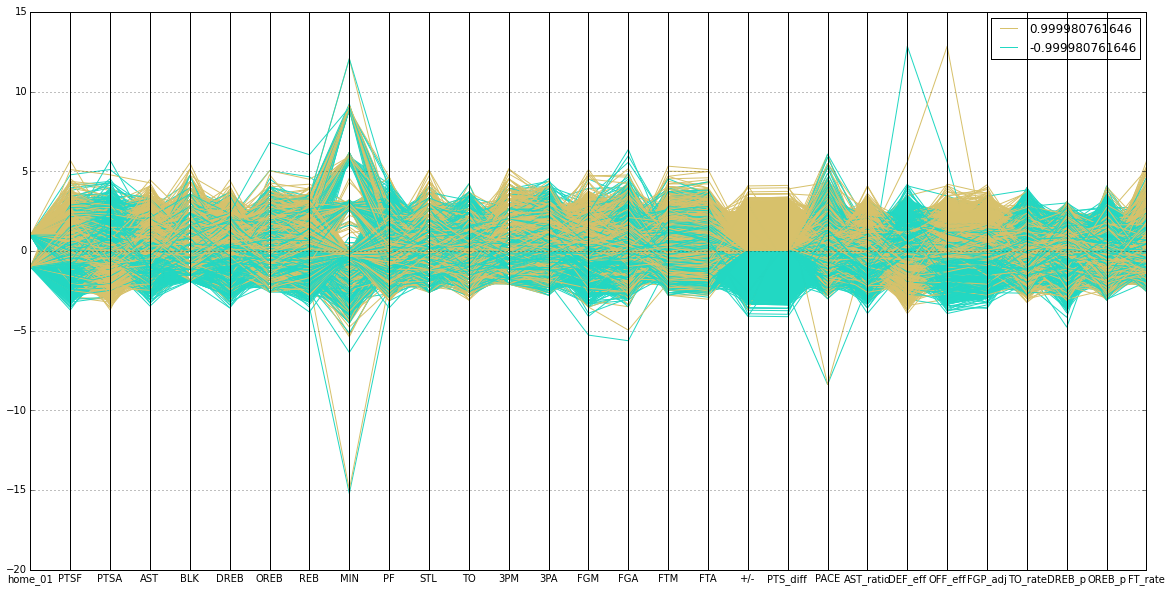

In [86]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#andrews_curves(gameStats.loc[:,colNames], 'win_01')
parallel_coordinates(gameStats_norm.loc[:,colNames_preds], 'win_01')

In [109]:
homeStats_norm = gameStats_norm[gameStats_norm.home_01 == True]
awayStats_norm = gameStats_norm[gameStats_norm.home_01 == False]

In [110]:
lookback = 14
homeStats_normMA = pd.rolling_mean(homeStats_norm, lookback)
awayStats_normMA = pd.rolling_mean(awayStats_norm, lookback)

homeStats_normMA.home_01 = homeStats.home_01
homeStats_normMA.win_01 = homeStats.win_01

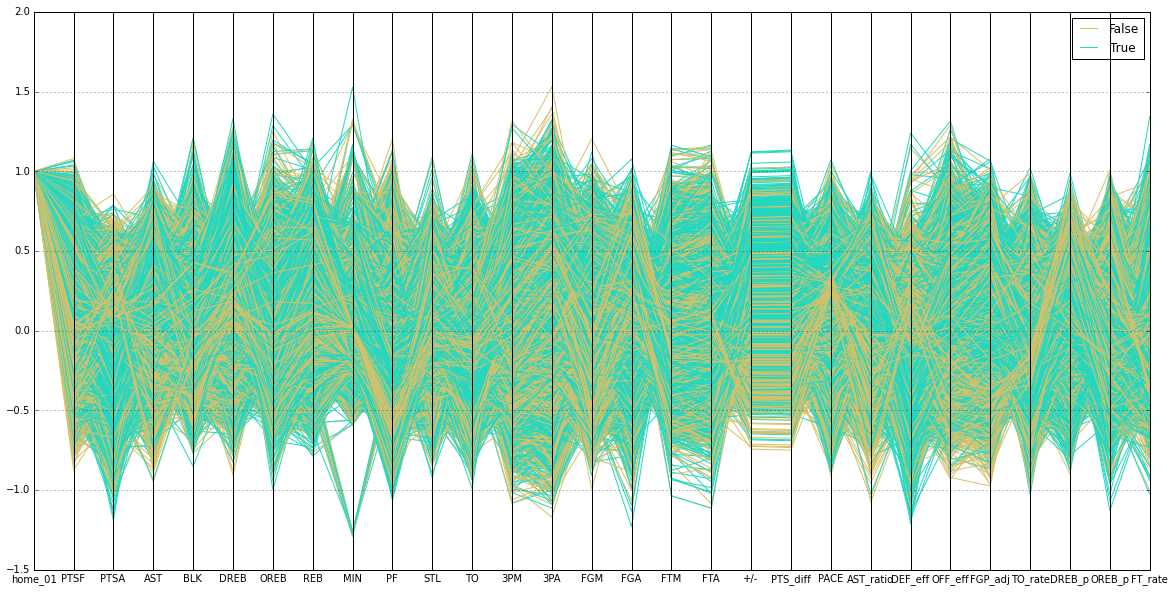

In [111]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#andrews_curves(gameStats.loc[:,colNames], 'win_01')
parallel_coordinates(homeStats_normMA.iloc[15::,:], 'win_01')

In [29]:


data_file_names = ['CEMA7','CEMA14','CEMA21','CEMA35',
                   'CSMA7','CSMA14','CSMA21','CSMA35']
for name in data_file_names:
    name_full = name + '.csv'
    data = pd.read_csv(name_full, index_col = [0])
    data1 = data.loc[:,'PTS_diff':'FT_rate']
    data2 = data.loc[:,'PTS_diff.1':'FT_rate.1']
    data3 = data1.append(data2)
    data1 = (data1 - data3.mean()) / (data3.std())
    data2 = (data2 - data3.mean()) / (data3.std())
    data1.merge(data2, how='outer')
    data1.to_csv(name+'norm'+'.csv', index = False)
    

In [37]:
boom = csma35.std().values
range(0,len(boom))-csma35.mean()

game_id   -3.153160e+08
season    -2.008860e+03
team_id   -1.254738e+01
home_01    2.000000e+00
win_01     3.400226e+00
PTSF      -9.402576e+01
PTSA      -9.310124e+01
AST       -1.445149e+01
BLK        3.181956e+00
DREB      -2.163782e+01
OREB      -1.138750e+00
REB       -3.077657e+01
MIN       -2.298221e+02
PF        -8.028043e+00
STL        6.582589e+00
...
FGM.1          14.036964
FGA.1         -29.207759
FTM.1          34.528582
FTA.1          29.596929
X....1         69.316769
PTS_diff.1     55.924147
PACE.1        -35.040061
AST_ratio.1    41.187086
DEF_eff.1     -48.552702
OFF_eff.1     -47.633527
FGP_adj.1      60.503084
TO_rate.1      61.851327
DREB_p.1       62.264173
OREB_p.1       63.735817
FT_rate.1      64.768887
Length: 66, dtype: float64